In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2
from image_segmentation import * 
from skimage import filters  
from scipy import ndimage 
from skimage.measure import label, regionprops, regionprops_table
import pandas as pd
from image_segmentation import *

In [2]:
def gray_thresh(image, low, high):
    image[image<low] = 0 
    image[image>high] = 255 
    return image

# Malaria-infected cells

In [3]:
file1 = '\malaria(1).jpeg' 
path = r'C:\Users\Ron\Desktop\Physics stuff\AY 2022-2023\AP157\github\Automated Feature Extraction (compiled)\images'
malaria = cv2.imread(path+file1,0) #load image in grayscale

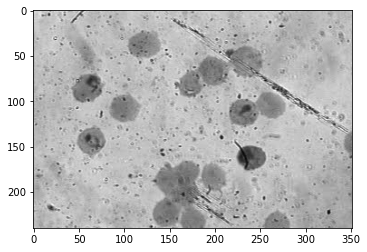

In [4]:
plt.imshow(malaria, cmap='gray')

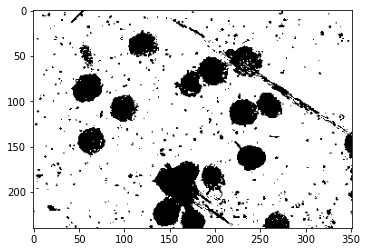

In [5]:
thresholded= gray_thresh(malaria, 121, 164)
val= filters.threshold_otsu(thresholded[np.isfinite(thresholded)])
plt.figure()
BW = thresholded > val
plt.imshow(BW, cmap='gray')

## Image cleaning 

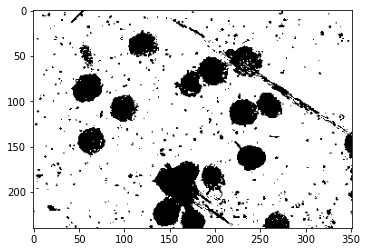

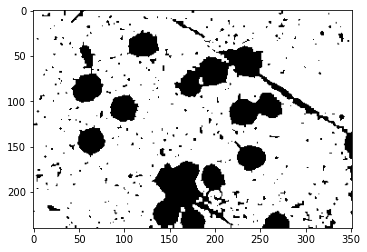

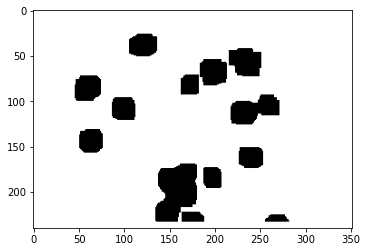

In [6]:
strel1 = np.ones((3,3))
plt.figure()
plt.imshow(BW, cmap='gray')
BW2= ndimage.binary_opening(BW, strel1)
plt.figure()
plt.imshow(BW2, cmap='gray')
BW3 = ndimage.binary_closing(BW2, np.ones((3,3)), iterations=7)
plt.figure()
BW3[0:7,:] = 1
BW3[:, 0:7] = 1
BW3[:, -7::] = 1
BW3[-7::, :] = 1
plt.imshow(BW3, cmap='gray')



## Labeling and Statistics

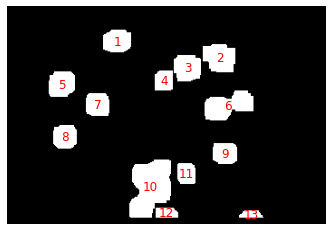

In [7]:
image = np.logical_not(BW3) #set the BW image to the new cleaned image 
label_img = label(image)
regions = regionprops(label_img)
props = regionprops_table(label_img, properties = ('area', 'perimeter', 'eccentricity', 'centroid', 'axis_major_length', 'axis_minor_length'))

plt.imshow(image,cmap='gray')

for region in regions:
    # Get the centroid of the region
    centroid = region.centroid
    
    # Get the label of the region
    label_value = region.label
    
    # Add the label as text on the image
    plt.text(centroid[1], centroid[0], str(label_value), color='red', fontsize=12, ha='center', va='center')

plt.axis('off')  # Turn off the axis labels
plt.show()
df= pd.DataFrame(props)
df.index = df.index + 1


In [9]:
df 

,area,perimeter,eccentricity,centroid-0,centroid-1,axis_major_length,axis_minor_length
1,689.0,98.627417,0.622546,38.137881,121.107402,33.620566,26.310893
2,945.0,124.727922,0.604557,56.562963,234.318519,39.407818,31.390756
3,777.0,107.556349,0.281240,67.626770,198.530245,32.369148,31.062646
4,425.0,77.656854,0.466766,81.736471,172.708235,25.120615,22.216192
5,735.0,101.213203,0.492941,85.469388,59.827211,33.007146,28.718294
6,1216.0,165.112698,0.903039,109.181743,243.528783,63.275543,27.180550
7,613.0,92.142136,0.345904,108.094617,99.539967,29.127130,27.329111
8,616.0,91.213203,0.219726,143.428571,63.547078,28.508408,27.811711
9,581.0,90.142136,0.536821,161.721170,240.061962,29.875892,25.206173
10,2249.0,216.669048,0.790896,199.024900,157.889729,71.665512,43.855773


Mean area: 747.62, Median area: 616.00, std area: 507.30
Mean perimeter: 105.24, Median perimeter: 92.14, std perimeter: 41.31
Mean eccentricity: 0.59, Median eccentricity: 0.54, std eccentricity: 0.23


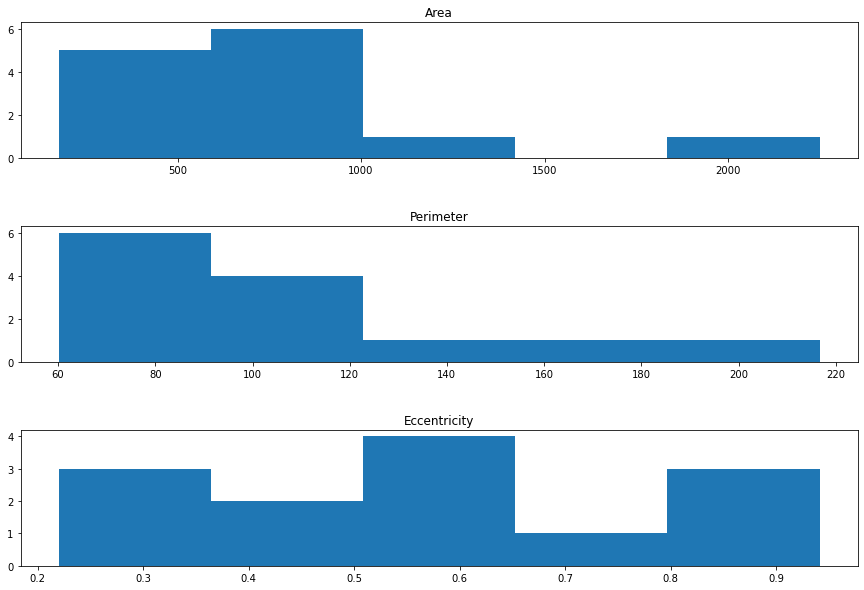

In [12]:
bins = 5
fig, ax = plt.subplots(3,1, figsize=(15,10))
ax[0].hist(df['area'], bins=bins)
ax[0].set_title('Area')
ax[1].hist(df['perimeter'], bins=bins)
ax[1].set_title('Perimeter')
ax[2].hist(df['eccentricity'], bins=bins)
ax[2].set_title('Eccentricity')
fig.subplots_adjust(hspace=0.5)
print('Mean area: {a:.2f}, Median area: {c:.2f}, std area: {b:.2f}'.format(a=np.mean(df['area']), c=np.median(df['area']), b=np.std(df['area'])))
print('Mean perimeter: {a:.2f}, Median perimeter: {c:.2f}, std perimeter: {b:.2f}'.format(a=np.mean(df['perimeter']), c=np.median(df['perimeter']), b=np.std(df['perimeter'])))
print('Mean eccentricity: {a:.2f}, Median eccentricity: {c:.2f}, std eccentricity: {b:.2f}'.format(a=np.mean(df['eccentricity']), c=np.median(df['eccentricity']), b=np.std(df['eccentricity'])))

# Stones 

In [13]:
file2 = '\stones.png' 
path = r'C:\Users\Ron\Desktop\Physics stuff\AY 2022-2023\AP157\github\Automated Feature Extraction (compiled)\images'
image = cv2.imread(path+file2, 0) #load image in grayscale

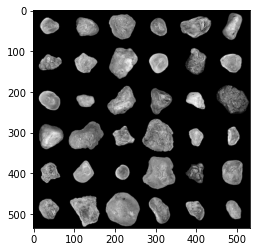

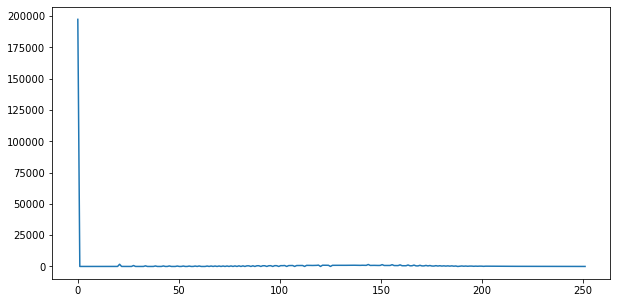

In [17]:
plt.imshow(image,cmap='gray') 
plt.figure(figsize=(10,5))
plt.plot(np.histogram(image, bins=256)[1][:-1], np.histogram(image, bins=256, density=False)[0]) #Displays grayscale histogram of image


## Thresholding 

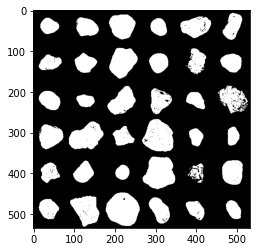

In [18]:
thresholded = gray_thresh(image, 18, 255)
val= filters.threshold_otsu(thresholded[np.isfinite(thresholded)])
plt.figure()
BW = thresholded > val
plt.imshow(BW, cmap='gray')

## Cleaning 

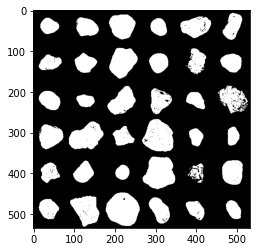

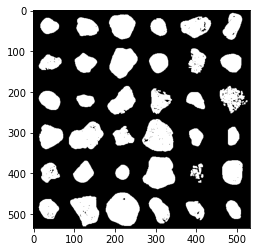

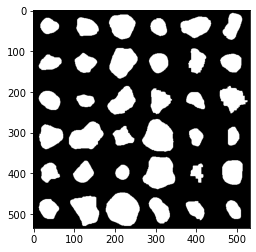

In [20]:
strel1 = np.ones((3,3))
plt.figure()
plt.imshow(BW, cmap='gray')
BW2= ndimage.binary_opening(BW, strel1)
plt.figure()
plt.imshow(BW2, cmap='gray')
BW3 = ndimage.binary_closing(BW2, strel1, iterations=5)
plt.figure()
plt.imshow(BW3, cmap='gray')

## Labeling and Statistics 

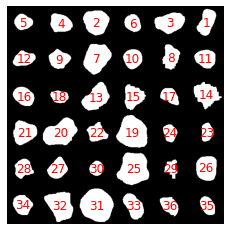

      area   perimeter  eccentricity  centroid-0  centroid-1  \
1   1982.0  187.681241      0.855320   39.139758  488.370838   
2   2987.0  208.166522      0.292468   38.728155  217.889186   
3   2777.0  210.994949      0.776612   40.206698  398.485056   
4   1943.0  169.882251      0.633416   41.631498  131.100875   
5   1334.0  137.539105      0.545511   38.927286   39.195652   
6   1346.0  139.639610      0.547615   41.474740  307.532689   
7   3616.0  234.450793      0.640164  127.147954  219.307522   
8   1821.0  182.468037      0.761722  124.516749  400.491488   
9   1798.0  164.166522      0.492800  129.965517  127.333704   
10  1761.0  155.195959      0.315971  128.687110  307.511641   
11  1827.0  159.781746      0.528672  128.466338  485.682540   
12  1507.0  155.296465      0.777210  128.992701   40.920372   
13  2921.0  223.622366      0.779639  223.926395  218.065731   
14  2665.0  240.225397      0.553053  216.193246  487.567730   
15  2148.0  197.539105      0.514295  22

In [21]:
label_img = label(BW3)
regions = regionprops(label_img)
props = regionprops_table(label_img, properties = ('area', 'perimeter', 'eccentricity', 'centroid', 'axis_major_length', 'axis_minor_length'))

plt.imshow(BW3,cmap='gray')

for region in regions:
    # Get the centroid of the region
    centroid = region.centroid
    
    # Get the label of the region
    label_value = region.label
    
    # Add the label as text on the image
    plt.text(centroid[1], centroid[0], str(label_value), color='red', fontsize=12, ha='center', va='center')

plt.axis('off')  # Turn off the axis labels
plt.show()
df= pd.DataFrame(props)
df.index = df.index + 1


In [23]:
df 

,area,perimeter,eccentricity,centroid-0,centroid-1,axis_major_length,axis_minor_length
1,1982.0,187.681241,0.855320,39.139758,488.370838,71.037483,36.804481
2,2987.0,208.166522,0.292468,38.728155,217.889186,63.541458,60.763126
3,2777.0,210.994949,0.776612,40.206698,398.485056,75.702257,47.690849
4,1943.0,169.882251,0.633416,41.631498,131.100875,57.119402,44.199634
5,1334.0,137.539105,0.545511,38.927286,39.195652,45.360783,38.017030
6,1346.0,139.639610,0.547615,41.474740,307.532689,45.445615,38.025722
7,3616.0,234.450793,0.640164,127.147954,219.307522,78.130711,60.022992
8,1821.0,182.468037,0.761722,124.516749,400.491488,61.177409,39.637081
9,1798.0,164.166522,0.492800,129.965517,127.333704,51.924136,45.181391
10,1761.0,155.195959,0.315971,128.687110,307.511641,48.760806,46.262733


Mean area: 2199.42, Median area: 1824.00, std area: 1083.40
Mean perimeter: 181.62, Median perimeter: 165.56, std perimeter: 43.64
Mean eccentricity: 0.60, Median eccentricity: 0.62, std eccentricity: 0.16


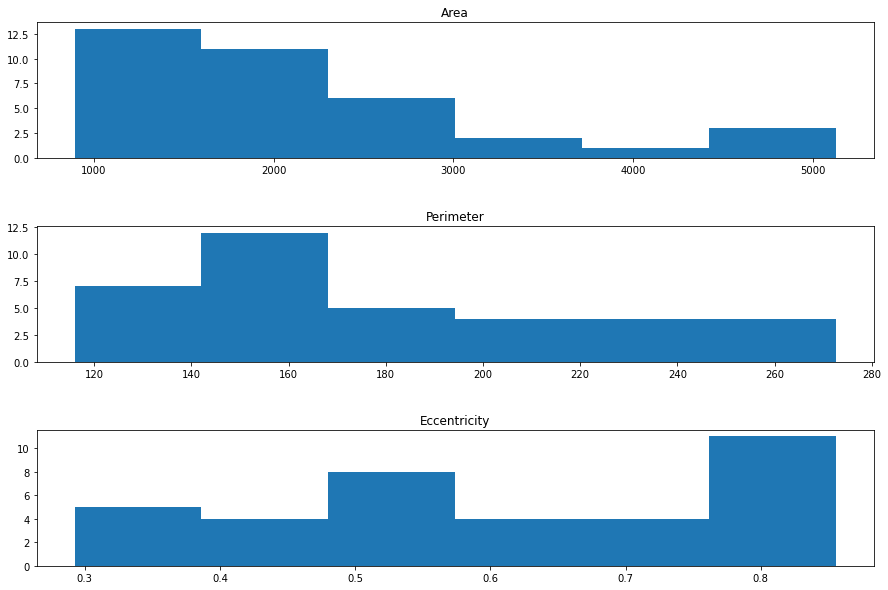

In [24]:
bins = int(np.sqrt(len(regions)))
fig, ax = plt.subplots(3,1, figsize=(15,10))
ax[0].hist(df['area'], bins=bins)
ax[0].set_title('Area')
ax[1].hist(df['perimeter'], bins=bins)
ax[1].set_title('Perimeter')
ax[2].hist(df['eccentricity'], bins=bins)
ax[2].set_title('Eccentricity')
fig.subplots_adjust(hspace=0.5)
print('Mean area: {a:.2f}, Median area: {c:.2f}, std area: {b:.2f}'.format(a=np.mean(df['area']), c=np.median(df['area']), b=np.std(df['area'])))
print('Mean perimeter: {a:.2f}, Median perimeter: {c:.2f}, std perimeter: {b:.2f}'.format(a=np.mean(df['perimeter']), c=np.median(df['perimeter']), b=np.std(df['perimeter'])))
print('Mean eccentricity: {a:.2f}, Median eccentricity: {c:.2f}, std eccentricity: {b:.2f}'.format(a=np.mean(df['eccentricity']), c=np.median(df['eccentricity']), b=np.std(df['eccentricity'])))


# Rice grains 

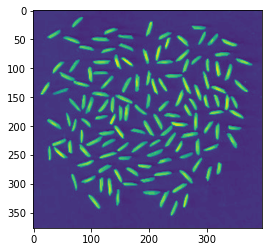

In [49]:
file2 = '\\1-Figure1-1.png' 
path = r'C:\Users\Ron\Desktop\Physics stuff\AY 2022-2023\AP157\github\Automated Feature Extraction (compiled)\images'
image = cv2.imread(path+file2, 0) #load image in grayscale
plt.imshow(image)

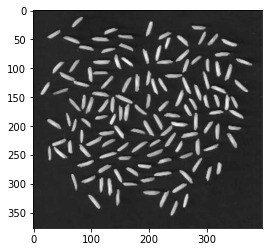

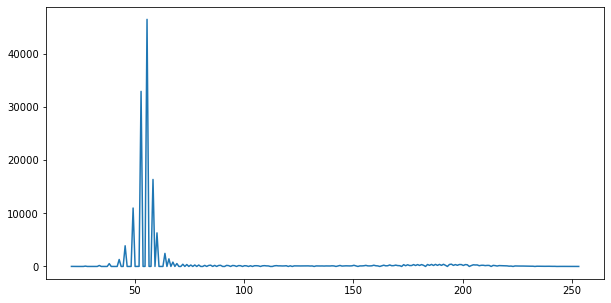

In [26]:
plt.imshow(image,cmap='gray') 
plt.figure(figsize=(10,5))
plt.plot(np.histogram(image, bins=256)[1][:-1], np.histogram(image, bins=256, density=False)[0]) #Displays grayscale histogram of image

<Figure size 432x288 with 0 Axes>

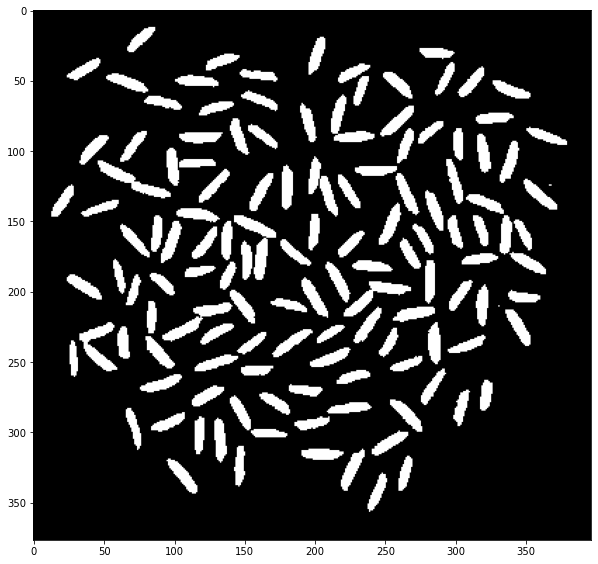

In [51]:
thresholded = gray_thresh(image, 80, 255)
val= filters.threshold_otsu(thresholded[np.isfinite(thresholded)])
plt.figure()
BW = thresholded > val
plt.figure(figsize=(10,10))
plt.imshow(BW, cmap='gray')

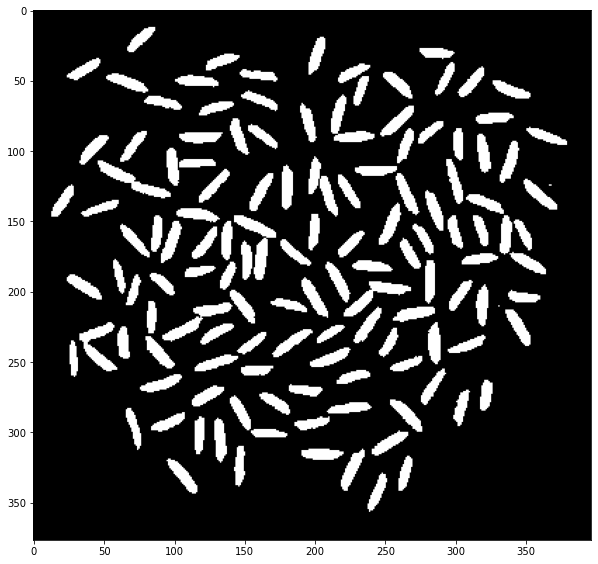

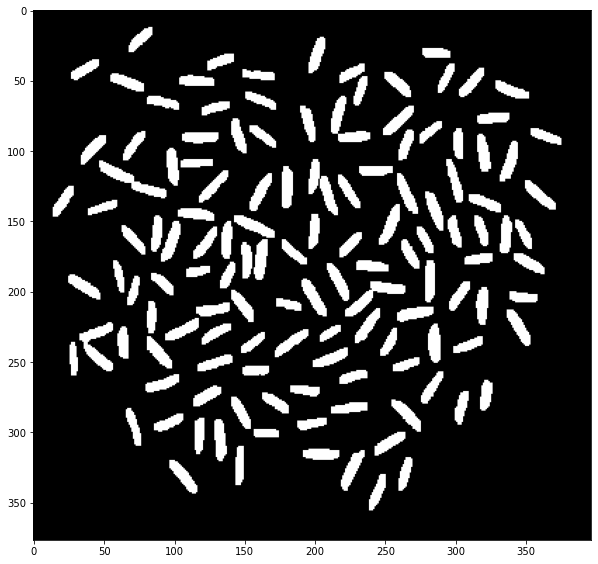

In [52]:
strel1 = np.ones((3,2))
plt.figure(figsize=(10,10))
plt.imshow(BW, cmap='gray')
BW2= ndimage.binary_opening(BW, strel1, iterations=2)
plt.figure(figsize=(10,10))
plt.imshow(BW2, cmap='gray')


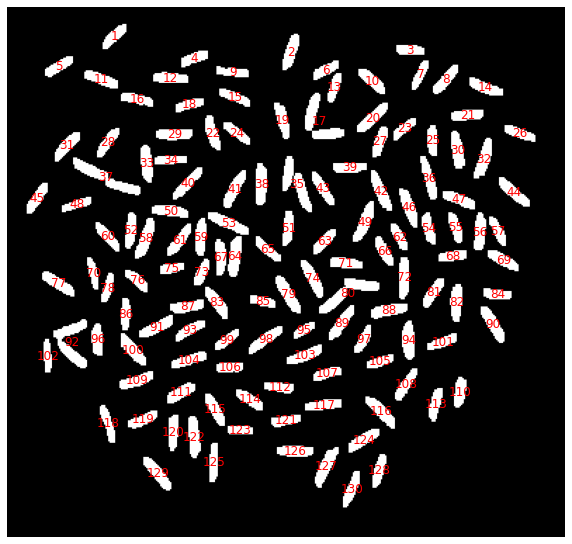

In [53]:
label_img = label(BW2)
regions = regionprops(label_img)
props = regionprops_table(label_img, properties = ('area', 'perimeter', 'eccentricity', 'centroid', 'axis_major_length', 'axis_minor_length'))

plt.figure(figsize=(10,10))
plt.imshow(BW2,cmap='gray')

for region in regions:
    # Get the centroid of the region
    centroid = region.centroid
    
    # Get the label of the region
    label_value = region.label
    
    # Add the label as text on the image
    plt.text(centroid[1], centroid[0], str(label_value), color='red', fontsize=12, ha='center', va='center')

plt.axis('off')  # Turn off the axis labels
plt.show()
df= pd.DataFrame(props)
df.index = df.index + 1


In [56]:
df 

,area,perimeter,eccentricity,centroid-0,centroid-1,axis_major_length,axis_minor_length
1,146.0,53.112698,0.947373,20.301370,75.910959,24.255278,7.764871
2,185.0,62.627417,0.956236,31.383784,201.513514,28.480828,8.333370
3,130.0,47.656854,0.938782,30.084615,286.284615,22.068148,7.602736
4,138.0,51.556349,0.936366,35.971014,132.818841,22.759825,7.989283
5,148.0,54.284271,0.951248,41.810811,36.418919,24.943718,7.693318
...,...,...,...,...,...,...,...
126,183.0,60.485281,0.954369,315.459016,204.562842,27.991101,8.358988
127,218.0,73.355339,0.965115,326.385321,226.417431,33.097533,8.665808
128,149.0,56.384776,0.960792,329.234899,264.308725,26.212676,7.267969
129,202.0,65.840620,0.963963,331.292079,106.599010,31.253062,8.314462


Mean area: 167.48, Median area: 161.00, std area: 45.39
Mean perimeter: 60.39, Median perimeter: 58.28, std perimeter: 13.90
Mean eccentricity: 0.95, Median eccentricity: 0.96, std eccentricity: 0.02


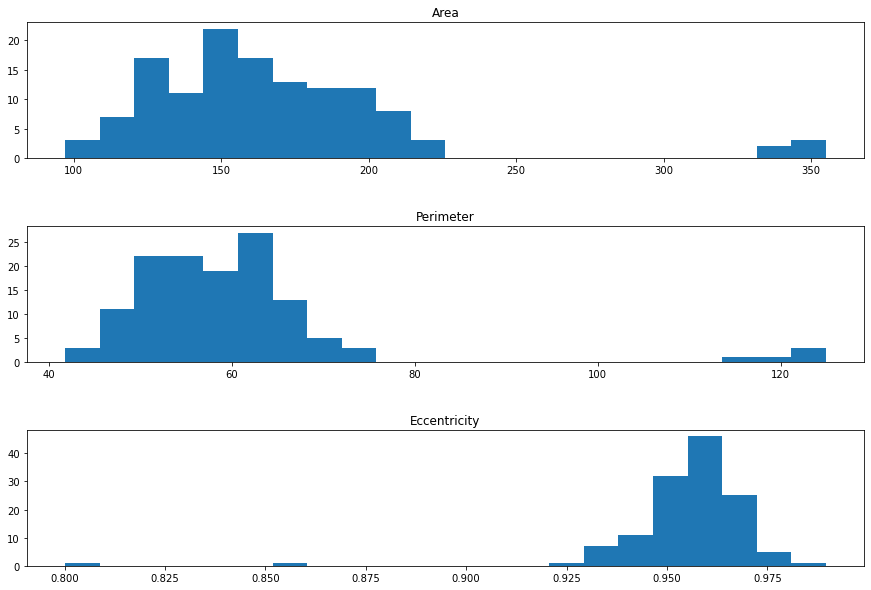

In [58]:
bins = 2*int(np.sqrt(len(regions)))
fig, ax = plt.subplots(3,1, figsize=(15,10))
ax[0].hist(df['area'], bins=bins)
ax[0].set_title('Area')
ax[1].hist(df['perimeter'], bins=bins)
ax[1].set_title('Perimeter')
ax[2].hist(df['eccentricity'], bins=bins)
ax[2].set_title('Eccentricity')
fig.subplots_adjust(hspace=0.5)
print('Mean area: {a:.2f}, Median area: {c:.2f}, std area: {b:.2f}'.format(a=np.mean(df['area']), c=np.median(df['area']), b=np.std(df['area'])))
print('Mean perimeter: {a:.2f}, Median perimeter: {c:.2f}, std perimeter: {b:.2f}'.format(a=np.mean(df['perimeter']), c=np.median(df['perimeter']), b=np.std(df['perimeter'])))
print('Mean eccentricity: {a:.2f}, Median eccentricity: {c:.2f}, std eccentricity: {b:.2f}'.format(a=np.mean(df['eccentricity']), c=np.median(df['eccentricity']), b=np.std(df['eccentricity'])))